In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

Like magic (someone elses hard work) we now have a cube to plug into openQmin. Now to run openQmin from the command line you would enter:

-i (iterations needed) --LX 240 --Ly 240 --Lz 28 --deltaT 0.001 -z 2 --hFieldY (field in ND) -- boundaryFile (filename) saveFile (filename)

In [1]:
def director_qmin_color(string, dimx, dimy, dimz):
    data = np.loadtxt(string, delimiter='	', converters=None, skiprows=0, usecols = (3,4,5,6,7))
    Qxx = data[:,0]
    Qxy = data[:,1]
    Qxz = data[:,2]
    Qyy = data[:,3]
    Qyz = data[:,4]
    Qmat = np.moveaxis(np.array([
                [Qxx, Qxy, Qxz],
                [Qxy, Qyy, Qyz],
                [Qxz, Qyz, -Qxx-Qyy]
                ]), -1, 0)
    evals, evecs = np.linalg.eigh(Qmat)
    n = (evecs[:,:,2])
    
    nx = n[:,0]
    ny = n[:,1]
    nz = n[:,2]
    
    
    color_ny_nx = np.absolute(np.arctan(ny/nx))
    color_nz_ny = np.absolute(np.arctan(nz/ny))

    color_ny_nx = np.reshape(color_ny_nx, (dimx,dimy,dimz), order='F')
    color_nz_ny = np.reshape(color_nz_ny, (dimx,dimy,dimz), order='F')
    nx = np.reshape(nx, (dimx,dimy,dimz), order='F')
    ny = np.reshape(ny, (dimx,dimy,dimz), order='F')
    nz = np.reshape(nz, (dimx,dimy,dimz), order='F')
    return(nx,ny,nz,color_ny_nx,color_nz_ny)

In [2]:
dimx = 240
dimy = 240
dimz = 28

l = 40
w = 40
h = 20

mid_x = mid_y = 120
mid_z = 14

In [24]:
init_string = 'data_open_Qmin/cuboid/cuboid_240_240_28_39_39_19_H'

init_string = st = 'data_open_Qmin/cuboid/cuboid_240_240_28_39_39_19_H'

#define file path for data
fp_0 = st + '_0_x0y0z0.txt'

In [26]:
H_0_nx, H_0_ny, H_0_nz, H_0_c_ny_nx, H_0_c_nz_ny = director_qmin_color(fp_0,dimx,dimy,dimz)

/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_24702/2280039487.py:21: RuntimeWarning: divide by zero encountered in divide
  color_ny_nx = np.absolute(np.arctan(ny/nx))
/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_24702/2280039487.py:21: RuntimeWarning: invalid value encountered in divide
  color_ny_nx = np.absolute(np.arctan(ny/nx))
/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_24702/2280039487.py:22: RuntimeWarning: divide by zero encountered in divide
  color_nz_ny = np.absolute(np.arctan(nz/ny))
/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_24702/2280039487.py:22: RuntimeWarning: invalid value encountered in divide
  color_nz_ny = np.absolute(np.arctan(nz/ny))


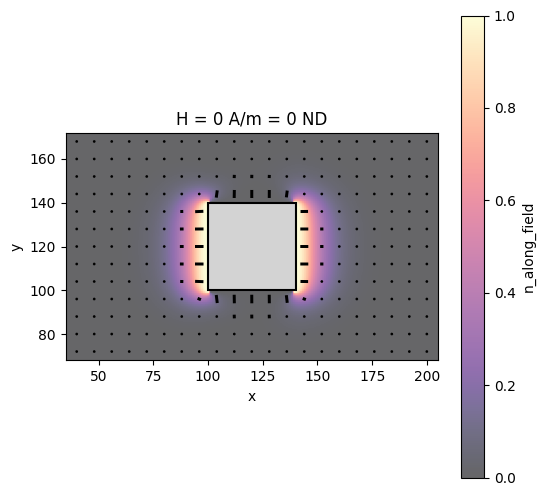

In [27]:
k_x_y = 8
scale = 40
width = .008
headaxislength = 0
headlength = 0
headwidth = .1

c = 'magma'

plt.figure(figsize=(6,6))

rect0 = plt.Rectangle((100, 100), 40 , 40 , linewidth=1.5, edgecolor='black', facecolor='lightgrey')
plt.imshow(np.abs(H_0_ny[:,:,mid_z]), cmap=c, alpha = 0.6)
cbar = plt.colorbar()

x, y = np.meshgrid(np.arange(H_0_ny.shape[1]), np.arange(H_0_ny.shape[0]))
sc = plt.quiver(x[::k_x_y, ::k_x_y], y[::k_x_y, ::k_x_y], H_0_ny[::k_x_y, ::k_x_y, mid_z], H_0_nx[::k_x_y, ::k_x_y, mid_z], pivot='middle', scale=scale, width=width, headaxislength=headaxislength, headlength=headlength, headwidth=headwidth, linewidths=width)

plt.gca().add_patch(rect0)
plt.xlim(35,205)
plt.ylim(68,172)

plt.title('H = 0 A/m = 0 ND')
plt.xlabel('x')
plt.ylabel('y')
cbar.set_label('n_along_field')

plt.show()

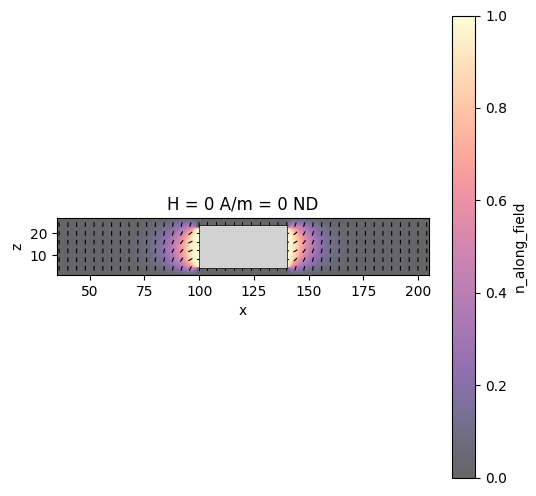

In [28]:
k_z = 4
scale = 80
width = .003
headaxislength = 0
headlength = 0
headwidth = 0
c = 'magma'

plt.figure(figsize=(6,6))

rect0 = plt.Rectangle((100, 4), 40 , 20 , linewidth=.5, edgecolor='black', facecolor='lightgrey')
plt.imshow(np.abs(H_0_ny[mid_x,:,:].T), cmap=c, alpha = 0.6)
cbar = plt.colorbar()

z_indices, y_indices = np.meshgrid(np.arange(0, H_0_ny.shape[2], k_z), np.arange(0, H_0_ny.shape[1], k_z), indexing='ij')

y_flat = y_indices.flatten()
z_flat = z_indices.flatten()

sc = plt.quiver(y_flat, z_flat, H_0_ny[mid_x, ::k_z, ::k_z].T.flatten(), H_0_nz[mid_x, ::k_z, ::k_z].T.flatten(), pivot='middle', scale=scale, width=width, headaxislength=headaxislength, headlength=headlength, headwidth=headwidth)

plt.gca().add_patch(rect0)

plt.xlim(35,205)
plt.ylim(1,27)

plt.title('H = 0 A/m = 0 ND')
plt.xlabel('x')
plt.ylabel('z')
cbar.set_label('n_along_field')

plt.show()